In [ ]:
"""
NOTEBOOK DE DEMONSTRATION DES FONCTIONNALITES DU MODULE TELENVI - PARTIE I
Thibaut Duvanel
Février 2022

Dépendances
-----------

Avant de commencer, s'assurer de disposer de toutes les librairies suivantes :
    - gdal
    - numpy
    - geopandas
    - matplotlib

Avant-propos
------------

Le fichier telenvi.py est appelé un "module". 
Cela signifie qu'il regroupe plusieurs outils et fonctions.
Nous pouvons accéder à ses fonctions depuis d'autres scripts python.

Le script dans lequel nous sommes est nommé "main.ipynb" et est situé dans le répertoire "projet_117".
Le script telenvi.py est situé dans le même répertoire, c'est pour ça qu'on peut l'importer directement en écrivant "import telenvi". 

Données utilisées :
    image sentinel 2A acquise le 18 Janvier 2019 au niveau de la frontière Niger - Nigeria.
    les bandes sont dans le dossier "data\images_brutes\S2A_20190118_NIGER"
"""
pass

In [ ]:
"""
La 1re mission du Telenvi est de faciliter le chargement d'images satellites (des fichiers rasters géoréférencés) dans python 
sous forme de matrices numpy.ndarray. Cela permet de réaliser des calculs matriciels dessus ou d'extraire les valeurs de leurs pixels. 
C'est utile pour calculer des indices ou encore pour faire du machine learning.

Sa 2e mission est d'être une sorte de couteau suisse avec lequel on peut facilement manipuler ces images: 
Modifier leur résolution, les découper sur des emprises particulières, changer leur système de coordonnées, les stacker...
"""
pass

In [ ]:
import telenvi

"""
1 - Chargement de bandes, calcul d'un indice et écriture du résultat
"""
# Définition des chemins
path_bande_4 = "data/images_brutes/S2A_20190118_NIGERIA/T32PMV_20190118T095331_B04.jp2"
path_bande_8 = "data/images_brutes/S2A_20190118_NIGERIA/T32PMV_20190118T095331_B08.jp2"

# Ouverture des deux images
B4 = telenvi.openGeoRaster(path_bande_4)
B8 = telenvi.openGeoRaster(path_bande_8)

# Calcul du ndvi
ndvi = (B8-B4)/(B8+B4)

# Export du résultat
ndvi.exportAsRaster("data/resultats/NDVI.tif")

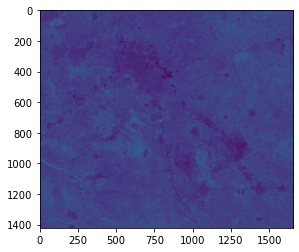


B4_crop.tif OK


In [9]:
"""
2 - Chargement d'une bande sur une région d'intérêt (roi), affichage rapide et rééxport
"""
from gdal import gdalconst
region = "data/study_area/study_area.shp" # Chemin vers un shapefile qui contient un polygone rectangulaire représentant une région d'intérêt
B4_crop = telenvi.openGeoRaster(path_bande_4, roi=region)

# Affichage pour vérifier que le crop a bien fonctionné
B4_crop.quickVisual()

# Export du découpage en choisissant le format de valeurs et le type de fichier
B4_crop.exportAsRaster("data/resultats/B4_crop.tif", format=gdalconst.GDT_Float32, driverName="GTiff")

"""
>>> L'éxecution de openGeoRaster est beaucoup beaucoup plus rapide quand on spécifie 
une zone d'intérêt que quand on charge une image entière
"""
pass

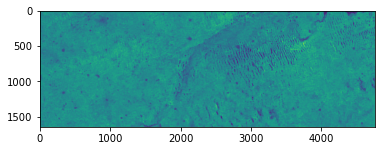

In [10]:
"""
Au passage, si mon shapefile contient plusieurs polygones rectangulaires, 
je peux spécifier lequel je veux utiliser en donnant sa position dans la table attributaire. 
'ft' c'est pour 'feature', ça veut dire 'entité'
"""
B4_crop2 = telenvi.openGeoRaster(
    path_bande_4, 
    roi=region,
    ft=1)

B4_crop2.quickVisual()

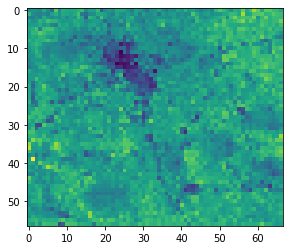

In [11]:
"""
3 - Chargement et rééchantillonage d'une image
"""
B8_crop_resample = telenvi.openGeoRaster(
    path_bande_8,
    roi=region,
    res=250)

# Affichage pour voir la tronche des pixels de 10m downgradés à 250
B8_crop_resample.quickVisual()

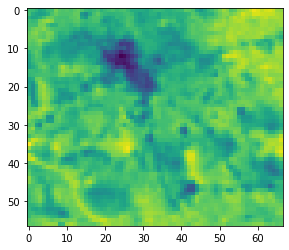

In [12]:
"""
Même chose mais en changeant la méthode de rééchantillonage (par défaut c'est nearest neighboor)
"""
B8_crop_resample_cs = telenvi.openGeoRaster(
    path_bande_8,
    roi=region,
    res=250,
    algo="cubicspline")

# Affichage
B8_crop_resample_cs.quickVisual()